주식 수익률을 최대로 하는 간단한 선형 모델을 만들어 봅시다 .

pandas data reader를 활용해서 주가를 받겠습니다. 

https://pandas-datareader.readthedocs.io/en/latest/


In [47]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pygad
import numpy as np
import pandas_datareader as pdr

In [49]:
# kospi 지수를 받습니다. 

df = pdr.DataReader('kospi', 'naver', start='2010-01-01')

In [50]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,168171,169614,168171,169614,291082
2010-01-05,170162,170239,168645,169062,402043
2010-01-06,169788,170689,169610,170532,420481
2010-01-07,170292,170790,168345,168345,456464
2010-01-08,169406,169526,166884,169526,371357
...,...,...,...,...,...
2022-05-18,263475,264413,261800,262598,870268
2022-05-19,257624,259779,256854,259234,677595
2022-05-20,260578,264168,260538,263929,755652


In [51]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [52]:
import pandas as pd

df =df[:].apply(pd.to_numeric)

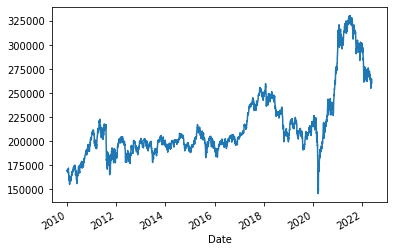

In [53]:
df.Close.plot()

In [54]:
# 가격이 소수점 2자리가 정수로 표현되어 수정해줍니다. 거래량을 제외하고 합니다. 

df.loc[:,'Open':'Close'] = df.loc[:,'Open':'Close' ].apply(lambda x: x/100)

In [55]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,291082
2010-01-05,1701.62,1702.39,1686.45,1690.62,402043
2010-01-06,1697.88,1706.89,1696.10,1705.32,420481
2010-01-07,1702.92,1707.90,1683.45,1683.45,456464
2010-01-08,1694.06,1695.26,1668.84,1695.26,371357


기간별 수익률을 만들어서 feature로 사용하고, 5일뒤 수익률을 최대화하기 위한 데이터를 만들어 봅시다

In [56]:
# 과거 날짜의 종가를 이동시켜서 컬럼을 만듭니다. 

df['1day'] = df.Close.shift(1)

In [57]:
df.head()

,Open,High,Low,Close,Volume,1day
Date,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,291082,NaN
2010-01-05,1701.62,1702.39,1686.45,1690.62,402043,1696.14
2010-01-06,1697.88,1706.89,1696.10,1705.32,420481,1690.62
2010-01-07,1702.92,1707.90,1683.45,1683.45,456464,1705.32
2010-01-08,1694.06,1695.26,1668.84,1695.26,371357,1683.45


In [58]:
df['5day']= df.Close.shift(5)
df['20day']= df.Close.shift(20)
df['60day']= df.Close.shift(60)
df['120day']= df.Close.shift(120)

In [59]:
# 수익률 계산을 합니다. 
df['rtn_1d'] = df.Close/df['1day']-1
df['rtn_5d'] = df.Close/df['5day']-1
df['rtn_20d'] = df.Close/df['20day']-1
df['rtn_60d'] = df.Close/df['60day']-1
df['rtn_120d'] = df.Close/df['120day']-1

In [60]:
df.head(20)

,Open,High,Low,Close,Volume,1day,5day,20day,60day,120day,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d
Date,,,,,,,,,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,291082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1701.62,1702.39,1686.45,1690.62,402043,1696.14,NaN,NaN,NaN,NaN,-0.003254,NaN,NaN,NaN,NaN
2010-01-06,1697.88,1706.89,1696.10,1705.32,420481,1690.62,NaN,NaN,NaN,NaN,0.008695,NaN,NaN,NaN,NaN
2010-01-07,1702.92,1707.90,1683.45,1683.45,456464,1705.32,NaN,NaN,NaN,NaN,-0.012825,NaN,NaN,NaN,NaN
2010-01-08,1694.06,1695.26,1668.84,1695.26,371357,1683.45,NaN,NaN,NaN,NaN,0.007015,NaN,NaN,NaN,NaN
2010-01-11,1700.79,1705.73,1694.12,1694.12,399263,1695.26,1696.14,NaN,NaN,NaN,-0.000672,-0.001191,NaN,NaN,NaN
2010-01-12,1695.83,1701.16,1683.29,1698.64,377882,1694.12,1690.62,NaN,NaN,NaN,0.002668,0.004744,NaN,NaN,NaN
2010-01-13,1683.51,1687.58,1671.11,1671.41,356033,1698.64,1705.32,NaN,NaN,NaN,-0.016030,-0.019885,NaN,NaN,NaN
2010-01-14,1680.68,1692.78,1677.46,1685.77,428554,1671.41,1683.45,NaN,NaN,NaN,0.008592,0.001378,NaN,NaN,NaN


In [61]:
# 5일 뒤의 수익률을 만들어 봅시다. 
df['future_rtn_5d'] = df.Close.shift(-5)/df.Close - 1


In [ ]:
df.head(20)

In [63]:
df= df.dropna()

In [64]:
# train, test데이터를 나눕니다. 

input_data = df[:'2021-12-31']
test_data = df['2022-01-01':]

In [65]:
# 필요한 데이터만 가져옵니다. 

input_df = input_data[['rtn_1d','rtn_5d','rtn_20d','rtn_60d','rtn_120d', 'future_rtn_5d']]


In [66]:
input_df.head(20)

,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,future_rtn_5d
Date,,,,,,
2010-06-28,0.001266,-0.004397,0.067323,0.023144,0.021160,-0.032713
2010-06-29,-0.014012,-0.013699,0.040524,-0.006637,0.010138,-0.013363
2010-06-30,-0.005545,-0.015952,0.041640,-0.014621,-0.004122,-0.013331
2010-07-01,-0.007095,-0.030824,0.014683,-0.022464,0.001657,0.007354
2010-07-02,-0.008552,-0.033541,0.004621,-0.031441,-0.013827,0.030619
2010-07-05,0.002123,-0.032713,0.022833,-0.029671,-0.011068,0.035025
2010-07-06,0.005712,-0.013363,0.020261,-0.028170,-0.008065,0.029758
2010-07-07,-0.005514,-0.013331,0.017259,-0.028310,0.002537,0.049151
2010-07-08,0.013720,0.007354,0.028419,-0.006818,0.007634,0.030995


In [67]:
# 과거 수익률을 간단한 점수 모델로 만들어 보고, 0 이상이면 매수, 이하면 보유 포지션 없도록 만들어봅시다. 

In [68]:
# 간단히 평가 함수를 만들어 봅시다
w = [0.3,-0.3,1,0,-1]
score = w * input_df.iloc[:,:-1]


In [69]:
score

,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d
Date,,,,,
2010-06-28,0.000380,0.001319,0.067323,0.0,-0.021160
2010-06-29,-0.004204,0.004110,0.040524,-0.0,-0.010138
2010-06-30,-0.001664,0.004786,0.041640,-0.0,0.004122
2010-07-01,-0.002129,0.009247,0.014683,-0.0,-0.001657
2010-07-02,-0.002565,0.010062,0.004621,-0.0,0.013827
...,...,...,...,...,...
2021-12-24,0.001427,0.000527,0.025878,-0.0,0.082153
2021-12-27,-0.001283,-0.003701,0.031014,-0.0,0.085999
2021-12-28,0.002069,-0.004559,0.063836,0.0,0.082889


In [70]:
score_sum = score.sum(axis= 1)

In [71]:
score_sum

Date
2010-06-28    0.047862
2010-06-29    0.030292
2010-06-30    0.048884
2010-07-01    0.020144
2010-07-02    0.025945
                ...   
2021-12-24    0.109985
2021-12-27    0.112030
2021-12-28    0.144235
2021-12-29    0.123078
2021-12-30    0.105135
Length: 2842, dtype: float64

In [72]:
# score가 0 이상이면 보유로 계산해서 수익률 최대화를 해보자
fitness = input_df[score_sum>0]['future_rtn_5d'].sum()

In [73]:
fitness

3.7160131116688886

In [74]:
# 적합도 함수를 정의합니다. 
# pygad는 적합도를 최대화하는 방식으로 최적화를 진행합니다. 
def fitness_func(solution, solution_idx):
    score = solution * input_df.iloc[:,:-1] # 행렬곱으로 w와 인풋을 계산
    score_sum = score.sum(axis= 1)
    fitness = input_df[score_sum>0]['future_rtn_5d'].sum()
    
    return fitness

In [75]:
gene_space = [{'low': -1, 'high': 1} for i in range(5)]

In [76]:
gene_space

[{'high': 1, 'low': -1},
 {'high': 1, 'low': -1},
 {'high': 1, 'low': -1},
 {'high': 1, 'low': -1},
 {'high': 1, 'low': -1}]

In [77]:
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 2

sol_per_pop = 8
num_genes = 5

init_range_low = -1
init_range_high = 1

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [78]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_space = gene_space)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [79]:
ga_instance.run()

In [80]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


Parameters of the best solution : [ 0.59307597 -0.19299154  0.08923523  0.15780748 -0.69900707]
Fitness value of the best solution = 4.412697810183836


In [81]:
score = solution * input_df.iloc[:,:-1]

In [82]:
score['score_sum'] = score.sum(axis= 1)

In [83]:
score

,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,score_sum
Date,,,,,,
2010-06-28,0.000751,0.000849,0.006008,0.003652,-0.014791,-0.003531
2010-06-29,-0.008310,0.002644,0.003616,-0.001047,-0.007087,-0.010185
2010-06-30,-0.003289,0.003079,0.003716,-0.002307,0.002882,0.004080
2010-07-01,-0.004208,0.005949,0.001310,-0.003545,-0.001158,-0.001653
2010-07-02,-0.005072,0.006473,0.000412,-0.004962,0.009665,0.006517
...,...,...,...,...,...,...
2021-12-24,0.002821,0.000339,0.002309,-0.002467,0.057425,0.060427
2021-12-27,-0.002536,-0.002381,0.002768,-0.003562,0.060114,0.054403
2021-12-28,0.004091,-0.002933,0.005696,0.000055,0.057940,0.064850


In [84]:
score['future_rtn_5d'] = input_df['future_rtn_5d']

In [85]:
score['position'] = score['score_sum'].apply(lambda x: 1 if x>0 else 0 )

In [86]:
score

,rtn_1d,rtn_5d,rtn_20d,rtn_60d,rtn_120d,score_sum,future_rtn_5d,position
Date,,,,,,,,
2010-06-28,0.000751,0.000849,0.006008,0.003652,-0.014791,-0.003531,-0.032713,0
2010-06-29,-0.008310,0.002644,0.003616,-0.001047,-0.007087,-0.010185,-0.013363,0
2010-06-30,-0.003289,0.003079,0.003716,-0.002307,0.002882,0.004080,-0.013331,1
2010-07-01,-0.004208,0.005949,0.001310,-0.003545,-0.001158,-0.001653,0.007354,0
2010-07-02,-0.005072,0.006473,0.000412,-0.004962,0.009665,0.006517,0.030619,1
...,...,...,...,...,...,...,...,...
2021-12-24,0.002821,0.000339,0.002309,-0.002467,0.057425,0.060427,-0.007854,1
2021-12-27,-0.002536,-0.002381,0.002768,-0.003562,0.060114,0.054403,-0.003437,1
2021-12-28,0.004091,-0.002933,0.005696,0.000055,0.057940,0.064850,-0.021942,1


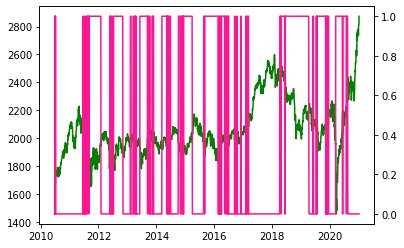

In [87]:
import matplotlib.pyplot as plt
start = '2010-01-01'
end = '2020-12-31'

fig, ax1 = plt.subplots()
ax1.plot(df.Close.loc[start:end], color='green')

ax2 = ax1.twinx()
ax2.plot(score.position[start:end], color='deeppink')

plt.show()



In [88]:
score = solution * test_data.loc[:,'rtn_1d':'rtn_120d']
score['future_rtn_5d'] = test_data['future_rtn_5d']
score['score_sum'] = score.sum(axis= 1)
score['position'] = score['score_sum'].apply(lambda x: 1 if x>0 else 0 )


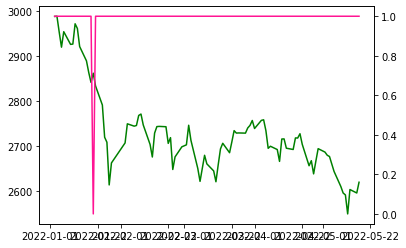

In [89]:
import matplotlib.pyplot as plt
start = '2022-01-01'
end = '2022-05-31'

fig, ax1 = plt.subplots()
ax1.plot(df.Close.loc[start:end], color='green')

ax2 = ax1.twinx()
ax2.plot(score.position[start:end], color='deeppink')

plt.show()
